# TUCKER


## SETUP


In [1]:
import sys
import os

# Adjust the path as needed to reach your project root from the notebook's location
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

project_root

'/Users/peterfalterbaum/Documents/Nova/thesis local/implementation/public_implementation'

In [2]:
from config import PROJECT_ROOT
from pathlib import Path

In [3]:
import json
import matplotlib.pyplot as plt

In [ ]:
# Load weekday performance metrics JSON
path_weekday_25 = str(
    PROJECT_ROOT) + "/data/results/decompositions/tucker/hourly_analysis/comparison_plots/performance_metrics_tucker_hourly_weekday_hourly_weekday_tucker_analysis_cumulative25pct_coreE80.json"

# Load weekday performance metrics JSON
path_weekday_20 = str(
    PROJECT_ROOT) + "/data/results/decompositions/tucker/hourly_analysis/comparison_plots/performance_metrics_tucker_hourly_weekday_hourly_weekday_tucker_analysis_cumulative20pct_coreE80.json"

In [ ]:
# Load weekend performance metrics JSON
path_weekend_25 = str(
    PROJECT_ROOT) + "/data/results/decompositions/tucker/hourly_analysis/comparison_plots/performance_metrics_tucker_hourly_weekend_hourly_weekend_tucker_analysis_cumulative25pct_coreE80.json"

# Load weekday performance metrics JSON
path_weekend_20 = str(
    PROJECT_ROOT) + "/data/results/decompositions/tucker/hourly_analysis/comparison_plots/performance_metrics_tucker_hourly_weekend_hourly_weekend_tucker_analysis_cumulative20pct_coreE80.json"

## IMPLEMENTATION


In [6]:
def load_results(file_path, city, algorithm):
    with open(file_path) as f:
        raw = json.load(f)

    # Extract Utrecht MU solver results
    mu_results = raw['data'][city.lower()][algorithm]
    return mu_results

In [7]:
def plot_tucker_rank_selection(file_path, city, algorithm, time_period, selected_triplet=None):
    """
    Plot EV, PE and # of strongest triplets (>=80% energy) for Tucker decompositions, optionally highlighting a selected triplet.

    Parameters:
    - file_path: path to JSON results
    - city: string identifier for the city
    - algorithm: string, one of 'MU' or 'HALS'
    - time_period: string for labeling (e.g. 'Weekday')
    - selected_triplet: optional string '(r_t, r_o, r_d)' to highlight
    """
    mu_results = load_results(file_path, city, algorithm)

    # Prepare entries for sorting by EV
    entries = []
    for triplet_str, metrics in mu_results.items():
        r_eff = metrics.get('num_core_triplets')
        if not r_eff:
            continue
        c1 = metrics.get('c1_unique_zones', 0)
        c2 = metrics.get('c2', 0)
        c3 = metrics.get('c3_distinct_time_bins', 0)
        EV = metrics.get('explained_variance', 0)
        PE = (c1 + c2 + c3) / r_eff
        entries.append((EV, PE, r_eff, triplet_str))

    # Sort by explained variance
    entries.sort(key=lambda x: x[0])
    EVs, PEs, r_effs, triplets = zip(*entries)

    # Set up plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    color_ev = '#0072B2'      # Blue
    color_pe = '#D55E00'      # Vermillion
    color_active = '#009E73'  # Teal
    dark_grey = '#333333'    # Highlight line

    x = range(len(triplets))

    # Plot EV on left axis
    ax1.plot(x, EVs, marker='o', color=color_ev,
             label='Explained Variance (EV)')
    ax1.set_xlabel('Rank Triplet (rₜ, rₒ, r_d) sorted by EV')
    ax1.set_ylabel('Explained Variance', color=color_ev)
    ax1.tick_params(axis='y', labelcolor=color_ev)
    ax1.set_xticks(x)
    ax1.set_xticklabels(triplets, rotation=90, fontsize=8)
    ax1.grid(which='both', linestyle='--', linewidth=0.4, alpha=0.6)

    # Plot PE and # of strongest triplets (>=80% energy) on common right axis
    ax2 = ax1.twinx()
    ax2.plot(x, PEs, marker='s', linestyle='--',
             color=color_pe, label='Pattern-Efficiency (PE)')
    ax2.plot(x, r_effs, marker='^', linestyle='-.',
             color=color_active, label='# of strongest triplets (>=80% energy)')
    ax2.set_ylabel(
        'PE & # of strongest triplets (>=80% energy)', color='black')
    ax2.tick_params(axis='y', labelcolor='black')

    # Align right-axis scale
    min_val = min(min(PEs), min(r_effs)) - 0.5
    max_val = max(max(PEs), max(r_effs)) + 0.5
    ax2.set_ylim(min_val, max_val)

    # Optional highlight of selected triplet
    if selected_triplet in triplets:
        idx = triplets.index(selected_triplet)
        ax1.axvline(x=idx, color=dark_grey, linestyle='--', linewidth=1)
        # ax1.text(idx, max(EVs), selected_triplet, rotation=90,
        #          va='bottom', ha='right', color=dark_grey, fontsize=8)

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2,
               loc='upper left', fontsize='small')

    plt.title(
        f'{city} {time_period}: EV, PE & # of strongest triplets (>=80% energy) vs. Rank Triplets')
    plt.tight_layout()

    # Extract cumulative threshold from file path
    if 'cumulative25pct' in file_path:
        threshold = '25pct'
    elif 'cumulative20pct' in file_path:
        threshold = '20pct'
    else:
        threshold = 'unknown'

    # Create unique filename
    import os
    save_dir = str(PROJECT_ROOT) + "/code/rank_selection/tucker"
    filename = f"{city.lower()}_{time_period.lower()}_{threshold}.png"
    save_path = os.path.join(save_dir, filename)

    # Save the plot
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

# Weekday


## Utrecht


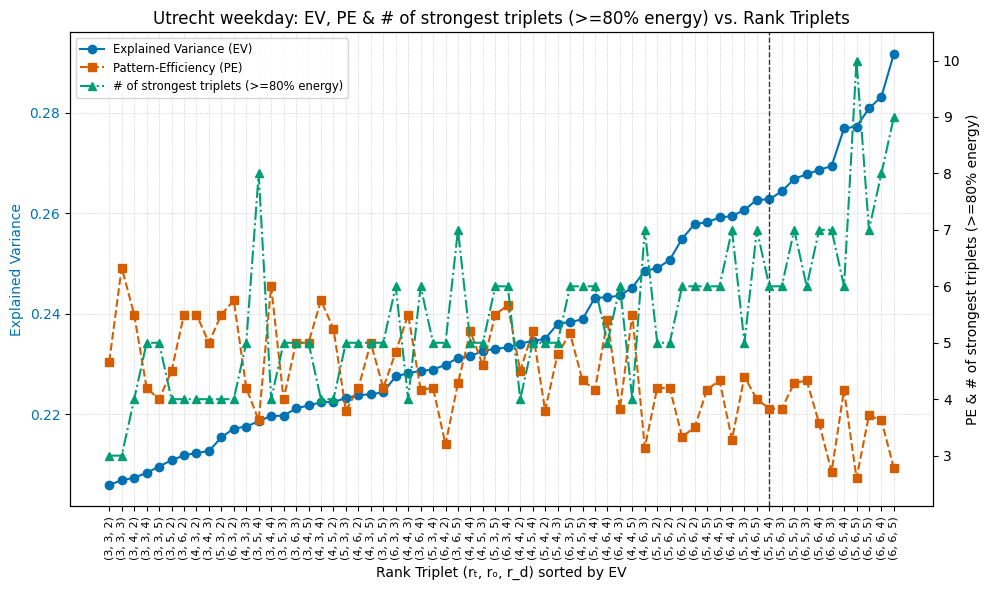

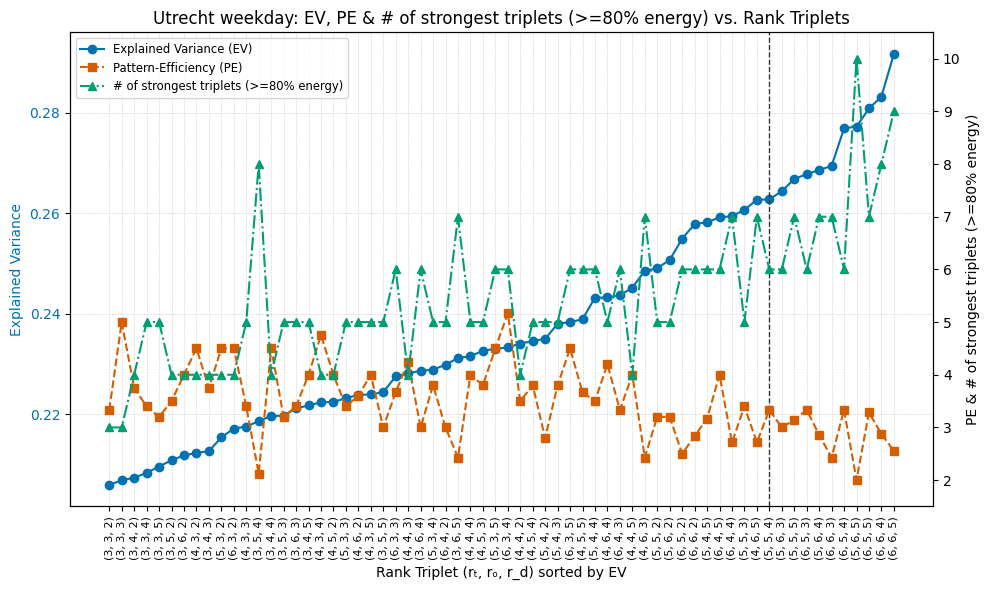

In [8]:
plot_tucker_rank_selection(path_weekday_25, "Utrecht",
                           "MU", "weekday", '(5, 5, 4)')
plot_tucker_rank_selection(path_weekday_20, "Utrecht",
                           "MU", "weekday", '(5, 5, 4)')

Utrecht:

- 6,5,4


## Rotterdam


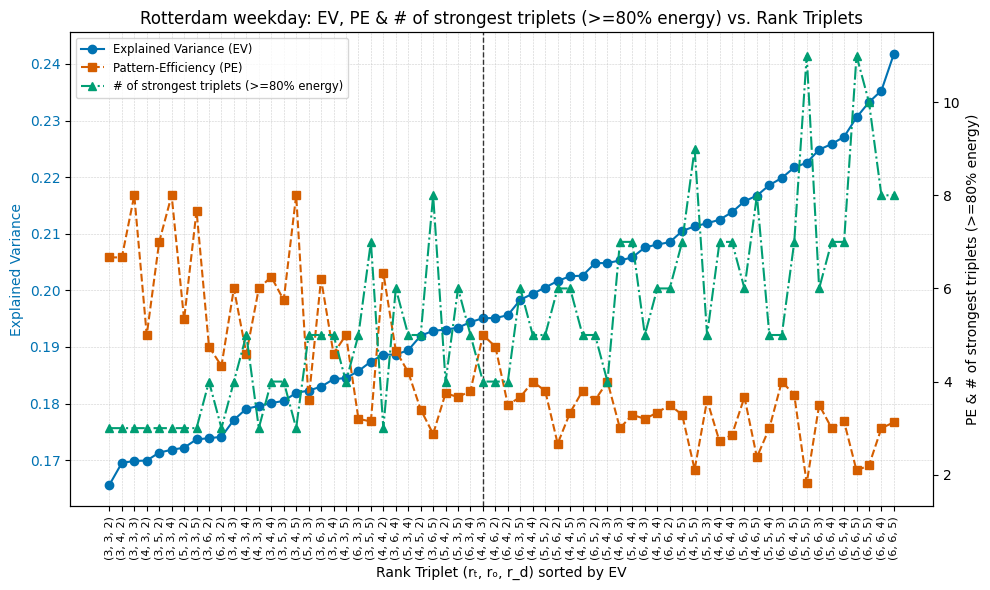

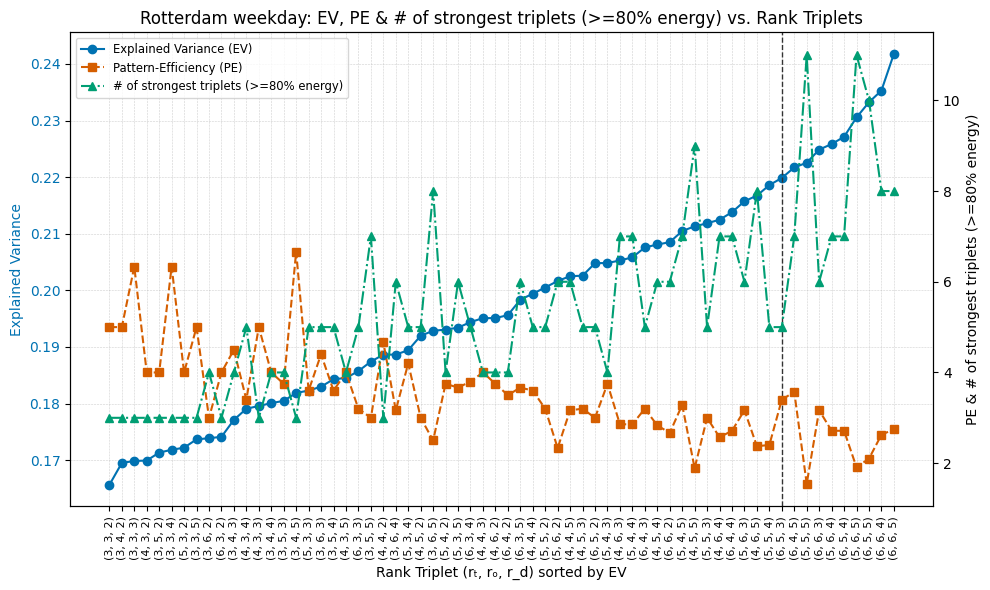

In [9]:
plot_tucker_rank_selection(
    path_weekday_25, "Rotterdam", "MU", "weekday", '(4, 4, 3)')
plot_tucker_rank_selection(
    path_weekday_20, "Rotterdam", "MU", "weekday", '(6, 5, 3)')

rotterdam:

25%

- 6,5,3
- 6,6,3

20%

- 6,4,5
- 5,4,3


# Weekend


## Utrecht


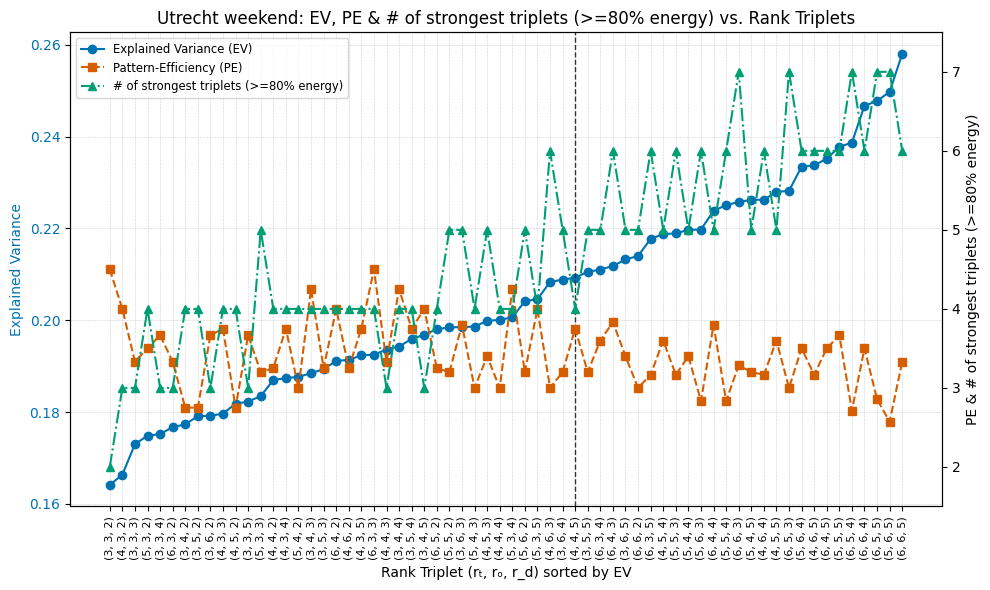

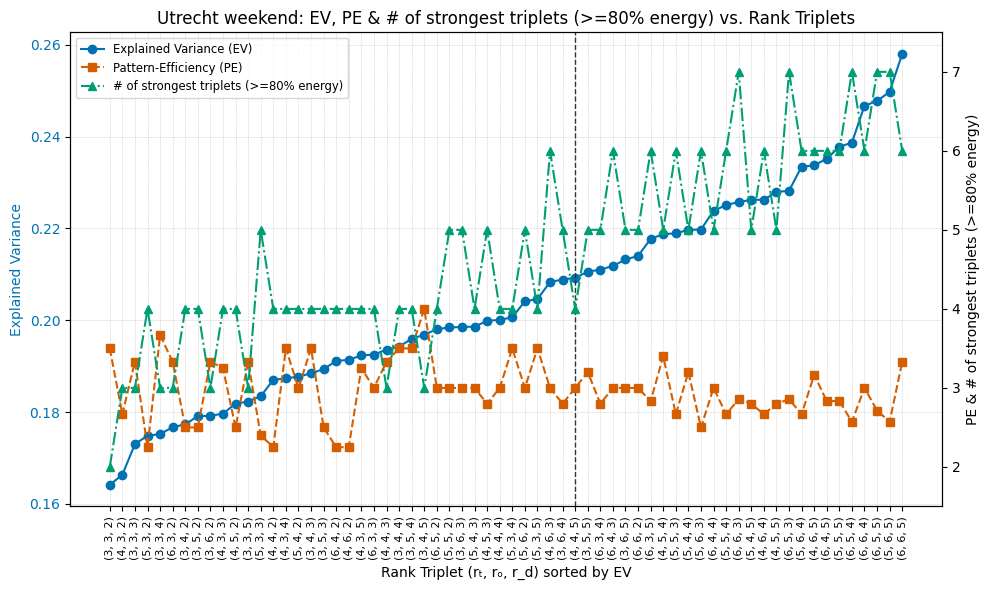

In [10]:
plot_tucker_rank_selection(path_weekend_25, "Utrecht",
                           "MU", "weekend", '(4, 4, 5)')
plot_tucker_rank_selection(path_weekend_20, "Utrecht",
                           "MU", "weekend", '(4, 4, 5)')

Utrecht:

25%

- 6,4,4
- 4,5,5
- 4,4,5
  20%
- 6,6,2


## Rotterdam


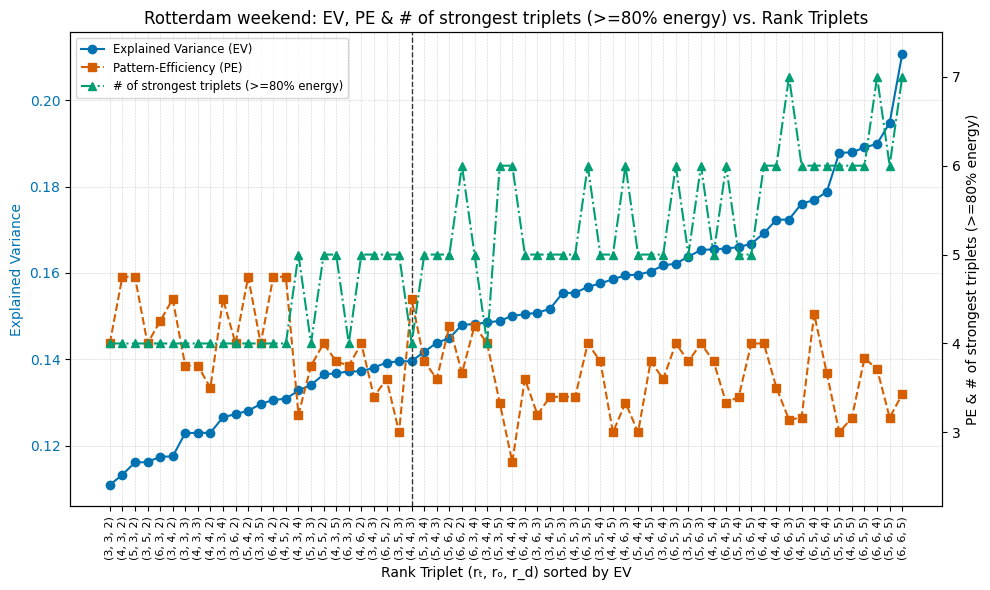

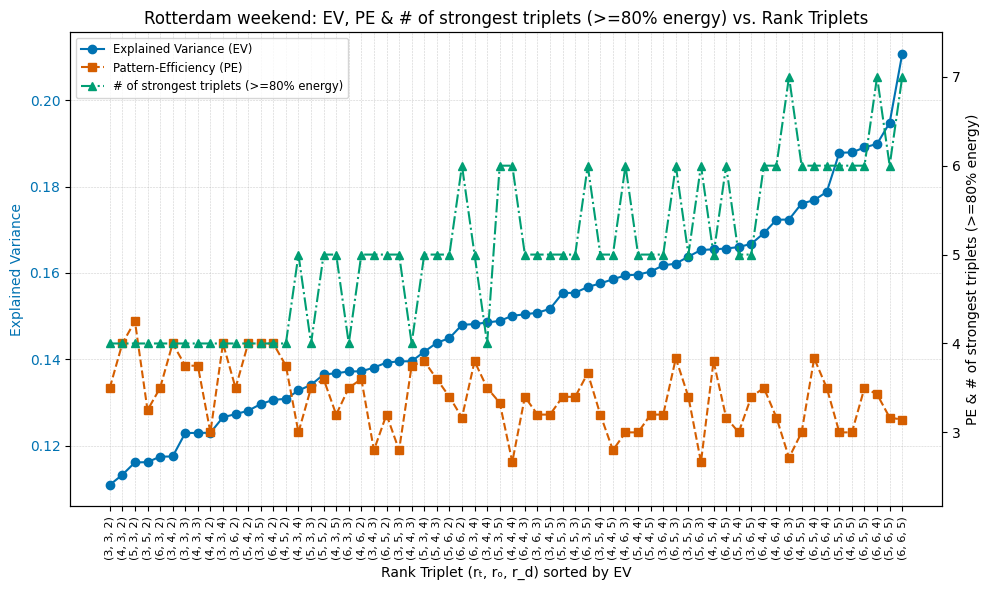

In [11]:
plot_tucker_rank_selection(
    path_weekend_25, "Rotterdam", "MU", "weekend", '(4, 4, 3)')
plot_tucker_rank_selection(path_weekend_20, "Rotterdam", "MU", "weekend")

Rotterdam:

25%

- 4,4,3
- 3,4,4
- 3,6,5

20%:

- 4,5,4
- 6,5,5
